# Simple EZ-CDM

The fitting procedure consists of the following steps:
- importing data
- calculating the statistics of data
- calculating estimates of parameters from statistics of data
- plotting fits

##  Importing data

The data should be a couple in the format of a list or a NumPy array in which `CA` represents the choice angle and `RT` represents the response time data.  
Here, we use an example for the data containing 200 trials which are simulated from the CDM with the following parameter values:

| Parameter | Value |
| ----------- | ----------- |
| drift length | 2 |
| drift angle | 0.2 |
| threshold | 2 |
| non-decision time | 0.6 |

The choice angle is in radian and response time is in second.

In [1]:
CA = [  1.298, -0.374,  0.783,  0.491, -0.141, -0.089,  0.724,  0.356,
        0.437, -0.304,  0.3  ,  0.   , -0.328,  0.98 , -0.457,  0.247,
        0.56 ,  0.736,  0.092,  0.887,  1.022,  0.597, -0.537, -0.247,
        0.454,  1.01 , -0.141, -0.217,  0.572,  0.12 , -0.507,  0.482,
        1.007,  0.937,  0.046, -0.322, -0.034,  0.86 ,  0.128,  0.065,
        1.467,  1.119, -0.009, -0.295, -0.34 , -0.617,  0.864, -0.429,
        0.708, -0.296, -0.357, -0.366,  0.168,  1.419,  0.864, -0.142,
        1.373, -0.268,  0.831,  0.609,  0.671, -0.799,  0.014,  0.448,
        1.021,  0.67 ,  0.089,  1.217,  0.679,  0.654,  0.935,  1.347,
       -0.265, -0.524,  0.056,  0.018,  0.413,  0.502,  0.183,  0.851,
        0.156,  0.84 ,  0.556,  0.633,  1.443,  1.814, -0.067,  0.295,
       -0.509, -0.234, -0.299, -0.538,  0.07 ,  0.045,  0.839,  0.075,
        0.818,  0.63 ,  1.041, -0.156,  0.51 , -0.479, -0.184, -0.57 ,
        0.302,  0.725, -0.668,  0.584,  0.097, -0.086,  0.168, -0.189,
       -0.06 ,  0.594, -0.23 ,  0.109,  0.313,  0.734,  0.736,  0.478,
        0.933,  0.112,  0.256,  0.05 ,  0.272,  0.336, -0.539, -0.337,
        0.286,  0.301,  0.749, -0.292,  0.581, -0.134, -0.056,  1.034,
        0.279, -0.735,  0.337,  1.091,  0.695, -0.126,  0.282,  0.377,
       -0.341,  0.681,  0.592, -0.245, -0.137,  0.213, -0.162,  0.15 ,
        0.599, -0.548, -0.836,  0.127,  0.245,  0.076,  0.204,  0.396,
        0.604,  0.155,  0.277, -0.893,  0.222, -0.438,  0.147,  0.387,
        0.021,  0.605, -0.085, -1.154, -0.247,  0.914,  0.754,  0.606,
       -0.228,  0.044, -0.178,  0.754, -0.135, -0.43 ,  1.305,  0.17 ,
        0.427,  0.158,  1.225,  0.373,  0.113,  1.009,  0.454,  0.874,
        0.572,  0.68 ,  0.846,  0.642,  0.661,  0.064,  0.839,  0.345 ]

RT = [ 1.779, 1.07 , 1.01 , 1.42 , 0.806, 1.491, 1.751, 1.473, 1.362,
       1.264, 1.071, 1.029, 1.331, 1.633, 1.452, 1.403, 1.648, 1.385,
       1.775, 2.531, 1.572, 3.21 , 1.313, 1.357, 2.074, 1.43 , 1.81 ,
       1.504, 1.237, 1.199, 1.081, 1.736, 2.163, 1.564, 1.372, 1.047,
       0.983, 1.295, 1.19 , 1.319, 1.008, 1.292, 1.814, 0.861, 0.987,
       1.125, 1.298, 1.515, 1.118, 1.074, 1.172, 1.82 , 1.208, 1.164,
       1.251, 1.313, 1.696, 1.409, 1.039, 1.558, 1.111, 1.667, 2.321,
       1.451, 1.986, 1.781, 0.931, 1.014, 1.217, 1.35 , 1.326, 0.936,
       1.308, 1.193, 1.433, 1.48 , 1.391, 1.307, 1.27 , 1.324, 1.535,
       1.074, 1.221, 1.241, 1.016, 1.131, 1.651, 1.896, 1.498, 1.4  ,
       1.392, 1.122, 1.21 , 0.949, 1.747, 1.357, 1.619, 1.019, 1.513,
       1.319, 0.869, 1.151, 2.842, 3.566, 0.932, 0.989, 1.293, 1.482,
       1.178, 1.718, 2.21 , 1.025, 1.741, 1.471, 1.546, 2.001, 1.706,
       1.399, 1.283, 1.846, 1.576, 0.952, 1.363, 1.118, 1.163, 1.348,
       1.026, 1.175, 1.034, 1.75 , 1.567, 1.397, 1.145, 2.005, 1.099,
       1.1  , 2.153, 1.381, 1.38 , 1.3  , 0.967, 1.633, 1.774, 1.867,
       1.954, 0.854, 1.228, 2.17 , 1.441, 3.017, 1.195, 1.582, 1.071,
       1.138, 1.392, 1.526, 1.715, 1.595, 1.29 , 1.829, 1.186, 1.055,
       1.39 , 3.263, 2.024, 1.567, 1.485, 1.329, 1.952, 2.184, 1.615,
       1.268, 1.306, 1.   , 1.237, 1.559, 1.655, 1.582, 1.118, 1.661,
       0.936, 1.527, 1.452, 1.095, 1.713, 1.247, 1.712, 1.808, 1.387,
       1.304, 1.066, 1.657, 1.321, 1.571, 1.656, 1.11 , 2.064, 1.062,
       1.702, 2.064 ]

We convert the data to numpy array form.

In [2]:
import numpy as np

CA = np.array(CA)
RT = np.array(RT)

## Calculating the statistics of data

First we should calculate the statistics of data (circular mean and variance of chaoice angle and mean and variance of response time):
\begin{equation*}
  \left\{
    \begin{aligned}
        & MCA = atan2 \Big(\frac{1}{N}\sum_{n=1}^N \sin \theta_n,\frac{1}{N}\sum_{n=1}^N \cos \theta_n\Big)  \\
        & VCA = 1-\sqrt{\Big(\frac{1}{N}\sum_{n=1}^N \cos\theta_n\Big)^2 + \Big(\frac{1}{N}\sum_{n=1}^N \sin\theta_n\Big)^2 }   \\
        & MRT = \frac{1}{N}\sum_{n=1}^N t_n  \\
        & VRT = \frac{1}{N}\sum_{n=1}^N \Big(t_n-\frac{1}{N}\sum_{n=1}^N t_n\Big)^2 
    \end{aligned}
  \right.
\end{equation*}

where $\theta_n$ and $t_n$ are respectively the $n^{th}$ choice angle and response time data points, and $N$ is the number of data points.

In [3]:
N = len(CA)
MCA = np.arctan2(sum(np.sin(CA))/N, sum(np.cos(CA))/N)
VCA = 1 - 1/N*np.sqrt(sum(np.cos(CA))**2+sum(np.sin(CA))**2)
MRT = np.mean(RT)
VRT = np.var(RT)

## Calculating estimates of parameters from statistics of data 

The calculations are as follow:
\begin{equation*}
  \left\{
    \begin{aligned}
        & \theta_v = MCA  \\
        & R = 1-VCA \\
        & \kappa_0 = \frac{R(2-R^2)}{1-R^2} \\
        & \kappa_1 = \kappa_0 - \frac{I_1(\kappa_0)/I_0(\kappa_0)-R}{1-I_1^2(\kappa_0)/I_0^2(\kappa_0)- I_1(\kappa_0)/\kappa_0 I_0(\kappa_0)} \\
        & v = \sqrt[4]{\frac{1}{VRT}\Big( \kappa_1^2R^2 + 2\kappa_1R-\kappa_1^2 \Big)} \\
        & a = \kappa_1/v \\
        & t_0 = MRT - \frac{a}{v}R
    \end{aligned}
  \right.
\end{equation*}

We use the Scipy library for the Bessel functions.

In [4]:
from scipy.special import iv

In [5]:
theta_v = MCA
R = 1 - VCA
k0 = R*(2-R**2)/(1-R**2)
k1 = k0 - (iv(1,k0)/iv(0,k0)-R)/(1-iv(1,k0)/iv(0,k0)*iv(1,k0)/iv(0,k0)-iv(1,k0)/iv(0,k0)/k0)
v = ((k1**2*R**2+2*k1*R-k1**2)/VRT)**(1/4)
a = k1/v
t0 = MRT-a/v*R

In [6]:
v, theta_v, a, t0

(1.9915392350538108,
 0.2751222693050222,
 2.0150380431993966,
 0.5799214921638016)

The estimated parameter values are:

| Parameter | Generating Value | Estimated Value |
| ----------- | ----------- | ----------- |
| drift length | 2 | 1.99 |
| drift angle | 0.2 | 0.275 |
| threshold | 2 | 2.02 |
| non-decision time | 0.6 | 0.580 |

## Plotting fits 

We can use the following formulas for calculating the marginal distributions of choice angle and response time to plot the fits of the model on data:

\begin{equation*}
    \begin{aligned}
        Pr(\theta) = & \frac{1}{2\pi I_0(av)}\exp\Big(va\cos(\theta-\theta_v)\Big) \\
        Pr(t) = &  \frac{I_0(av)}{a^2}\sum_{i =1}^{\infty}\frac{j_{0,i}}{J_1(j_{0,i})}\exp\big(-\frac{(t-t_0)}{2}(v^2+\frac{j_{0,i}^2}{a^2})\big) 
    \end{aligned}
\end{equation*}

In [7]:
def PrCA(v, theta_v, a, t0, theta):
    return np.exp(a*v*np.cos(theta-theta_v))/2/np.pi/iv(0,v*a)

In [8]:
import scipy

j0 = scipy.special.jn_zeros(0, 200)
J1 = scipy.special.jv(1, j0)

def PrRT(v, theta_v, a, t0, t):
    if t<=t0:
        return 0
    else:
        ans = sum(j0/J1*np.exp(-j0**2*(t-t0)/2/a**2))/a**2*np.exp(-v**2*(t-t0)/2)*iv(0,v*a)
        if ans<0: # returning 0 for negative probability
            ans = 0
        if j0[-1]/J1[-1]*np.exp(-j0[-1]**2*(t-t0)/2/a**2) != 0: # returning 0 for non-convereged series
            ans = 0
        return ans

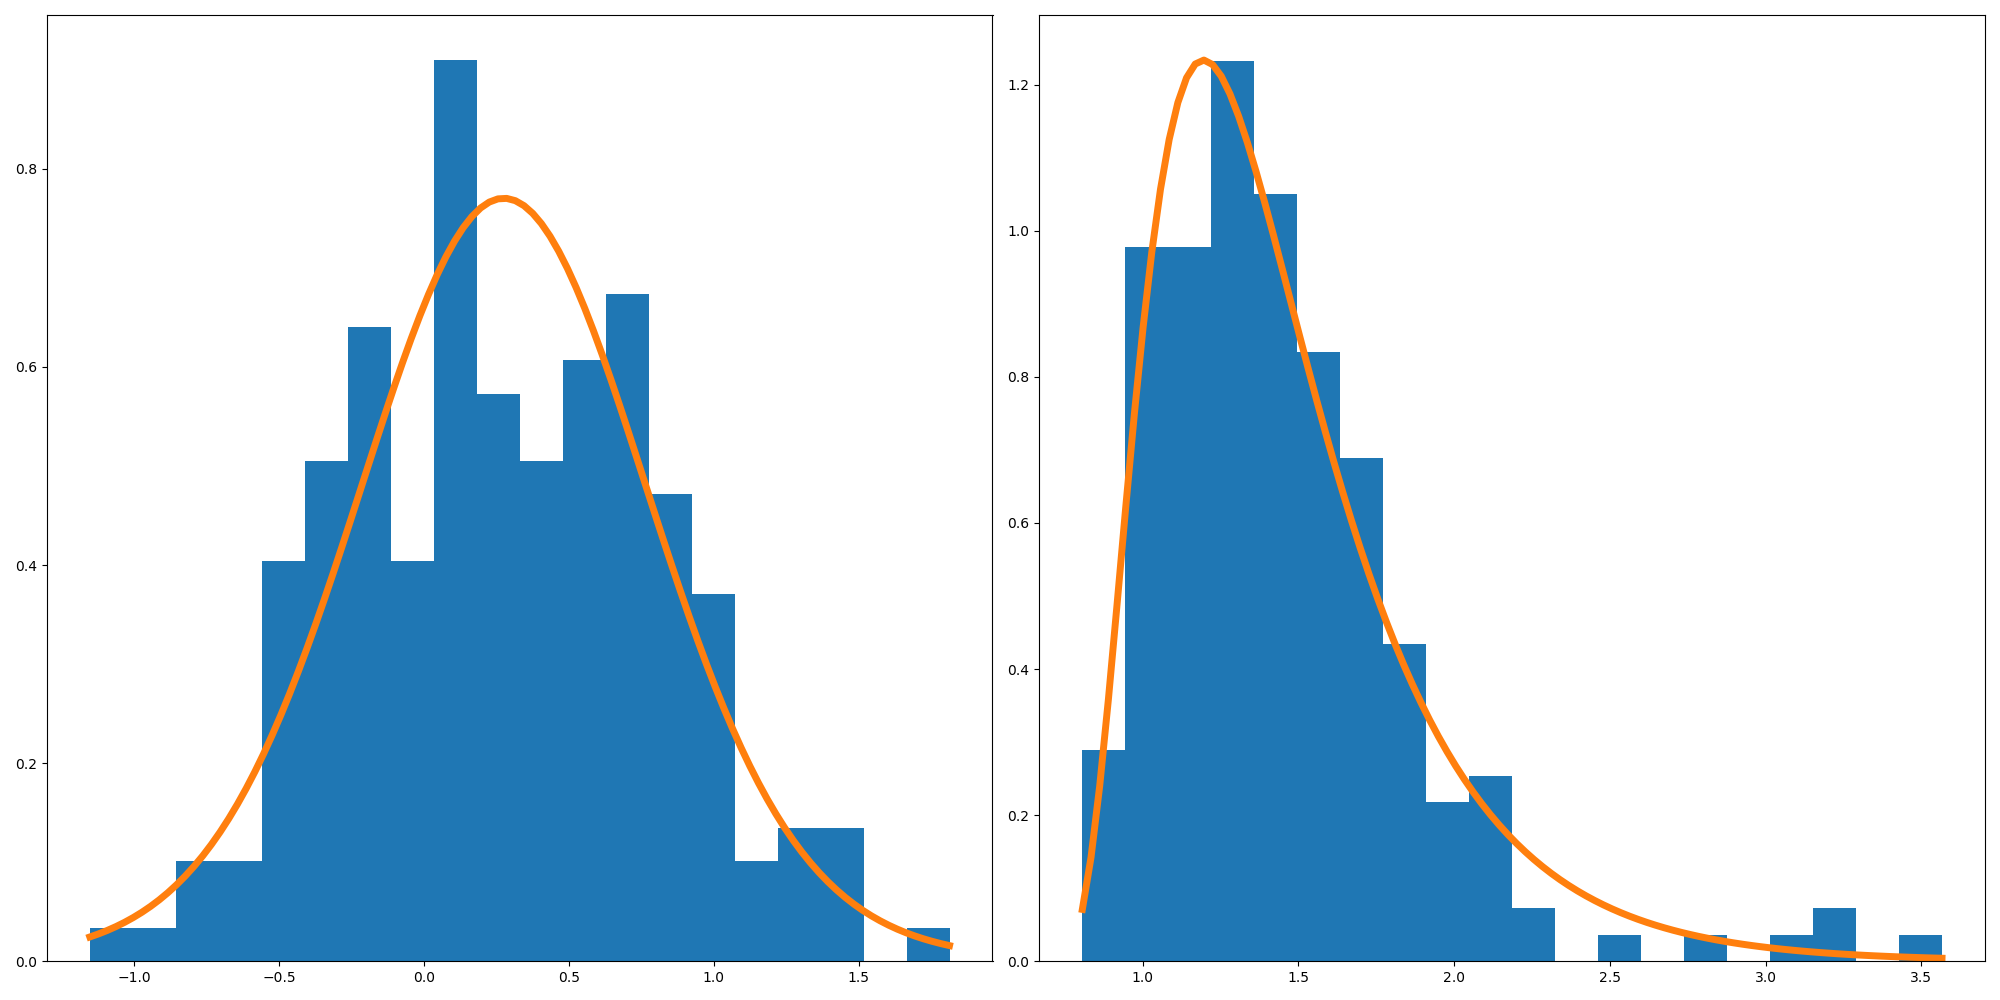

In [9]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(1, 2, figsize=(20,10), tight_layout=True)

theta = np.linspace(min(CA), max(CA), 100)
Pr_theta = np.empty(len(theta))
for i in range(len(theta)):
    Pr_theta[i] = PrCA(v, theta_v, a, t0, theta[i])
    
t = np.linspace(min(RT), max(RT), 100)
Pr_t = np.empty(len(t))
for i in range(len(t)):
    Pr_t[i] = PrRT(v, theta_v, a, t0, t[i])
    
axis[0].hist(CA, bins=20, density=True)
axis[0].plot(theta, Pr_theta, linewidth=5)
axis[1].hist(RT, bins=20, density=True)
axis[1].plot(t, Pr_t, linewidth=5)
plt.show()